# Colorful dimension on multi class calssifier

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #for HiDpi display

In [2]:
from colorfuldim import ActivationsHistogram

In [3]:
from fastai.vision import *

# Print current version
from fastai.version import __version__
print('fastai version: ', __version__)

fastai version:  1.0.53.dev0


## Take a look of what happens during LR find...

Classes: 10 => ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02
Min loss divided by 10: 2.51E-02


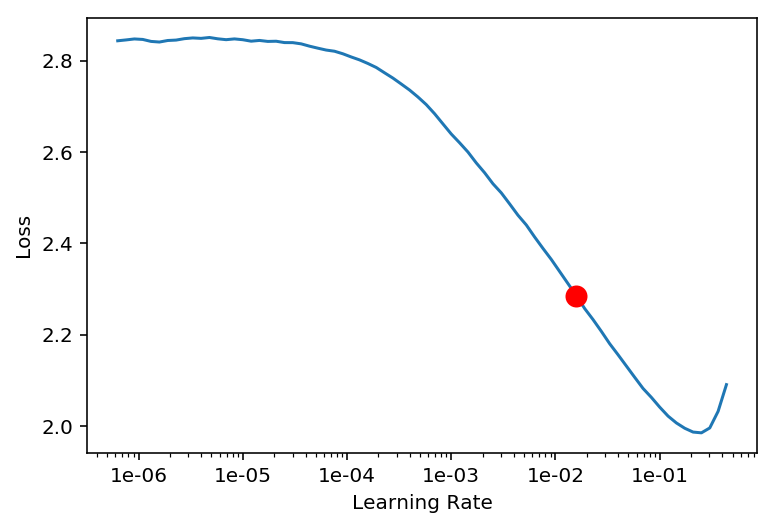

In [4]:
actsh = partial(ActivationsHistogram,hMin=-25,hMax=25,nBins=1600,modulesId=None,useClasses=False,liveChart=False)

bs = 1024
path = untar_data(URLs.CIFAR)
items = ImageList.from_folder(path)
data = (items.split_by_rand_pct(.2,seed=123)
        .label_from_folder()
        .databunch(bs=bs)
       )
print(f'Classes: {data.c} => {data.classes}')

learn = cnn_learner(data, models.resnet50, 
                    callback_fns=actsh,
                    metrics=accuracy)
learn.lr_find()
learn.recorder.plot(suggestion=True)

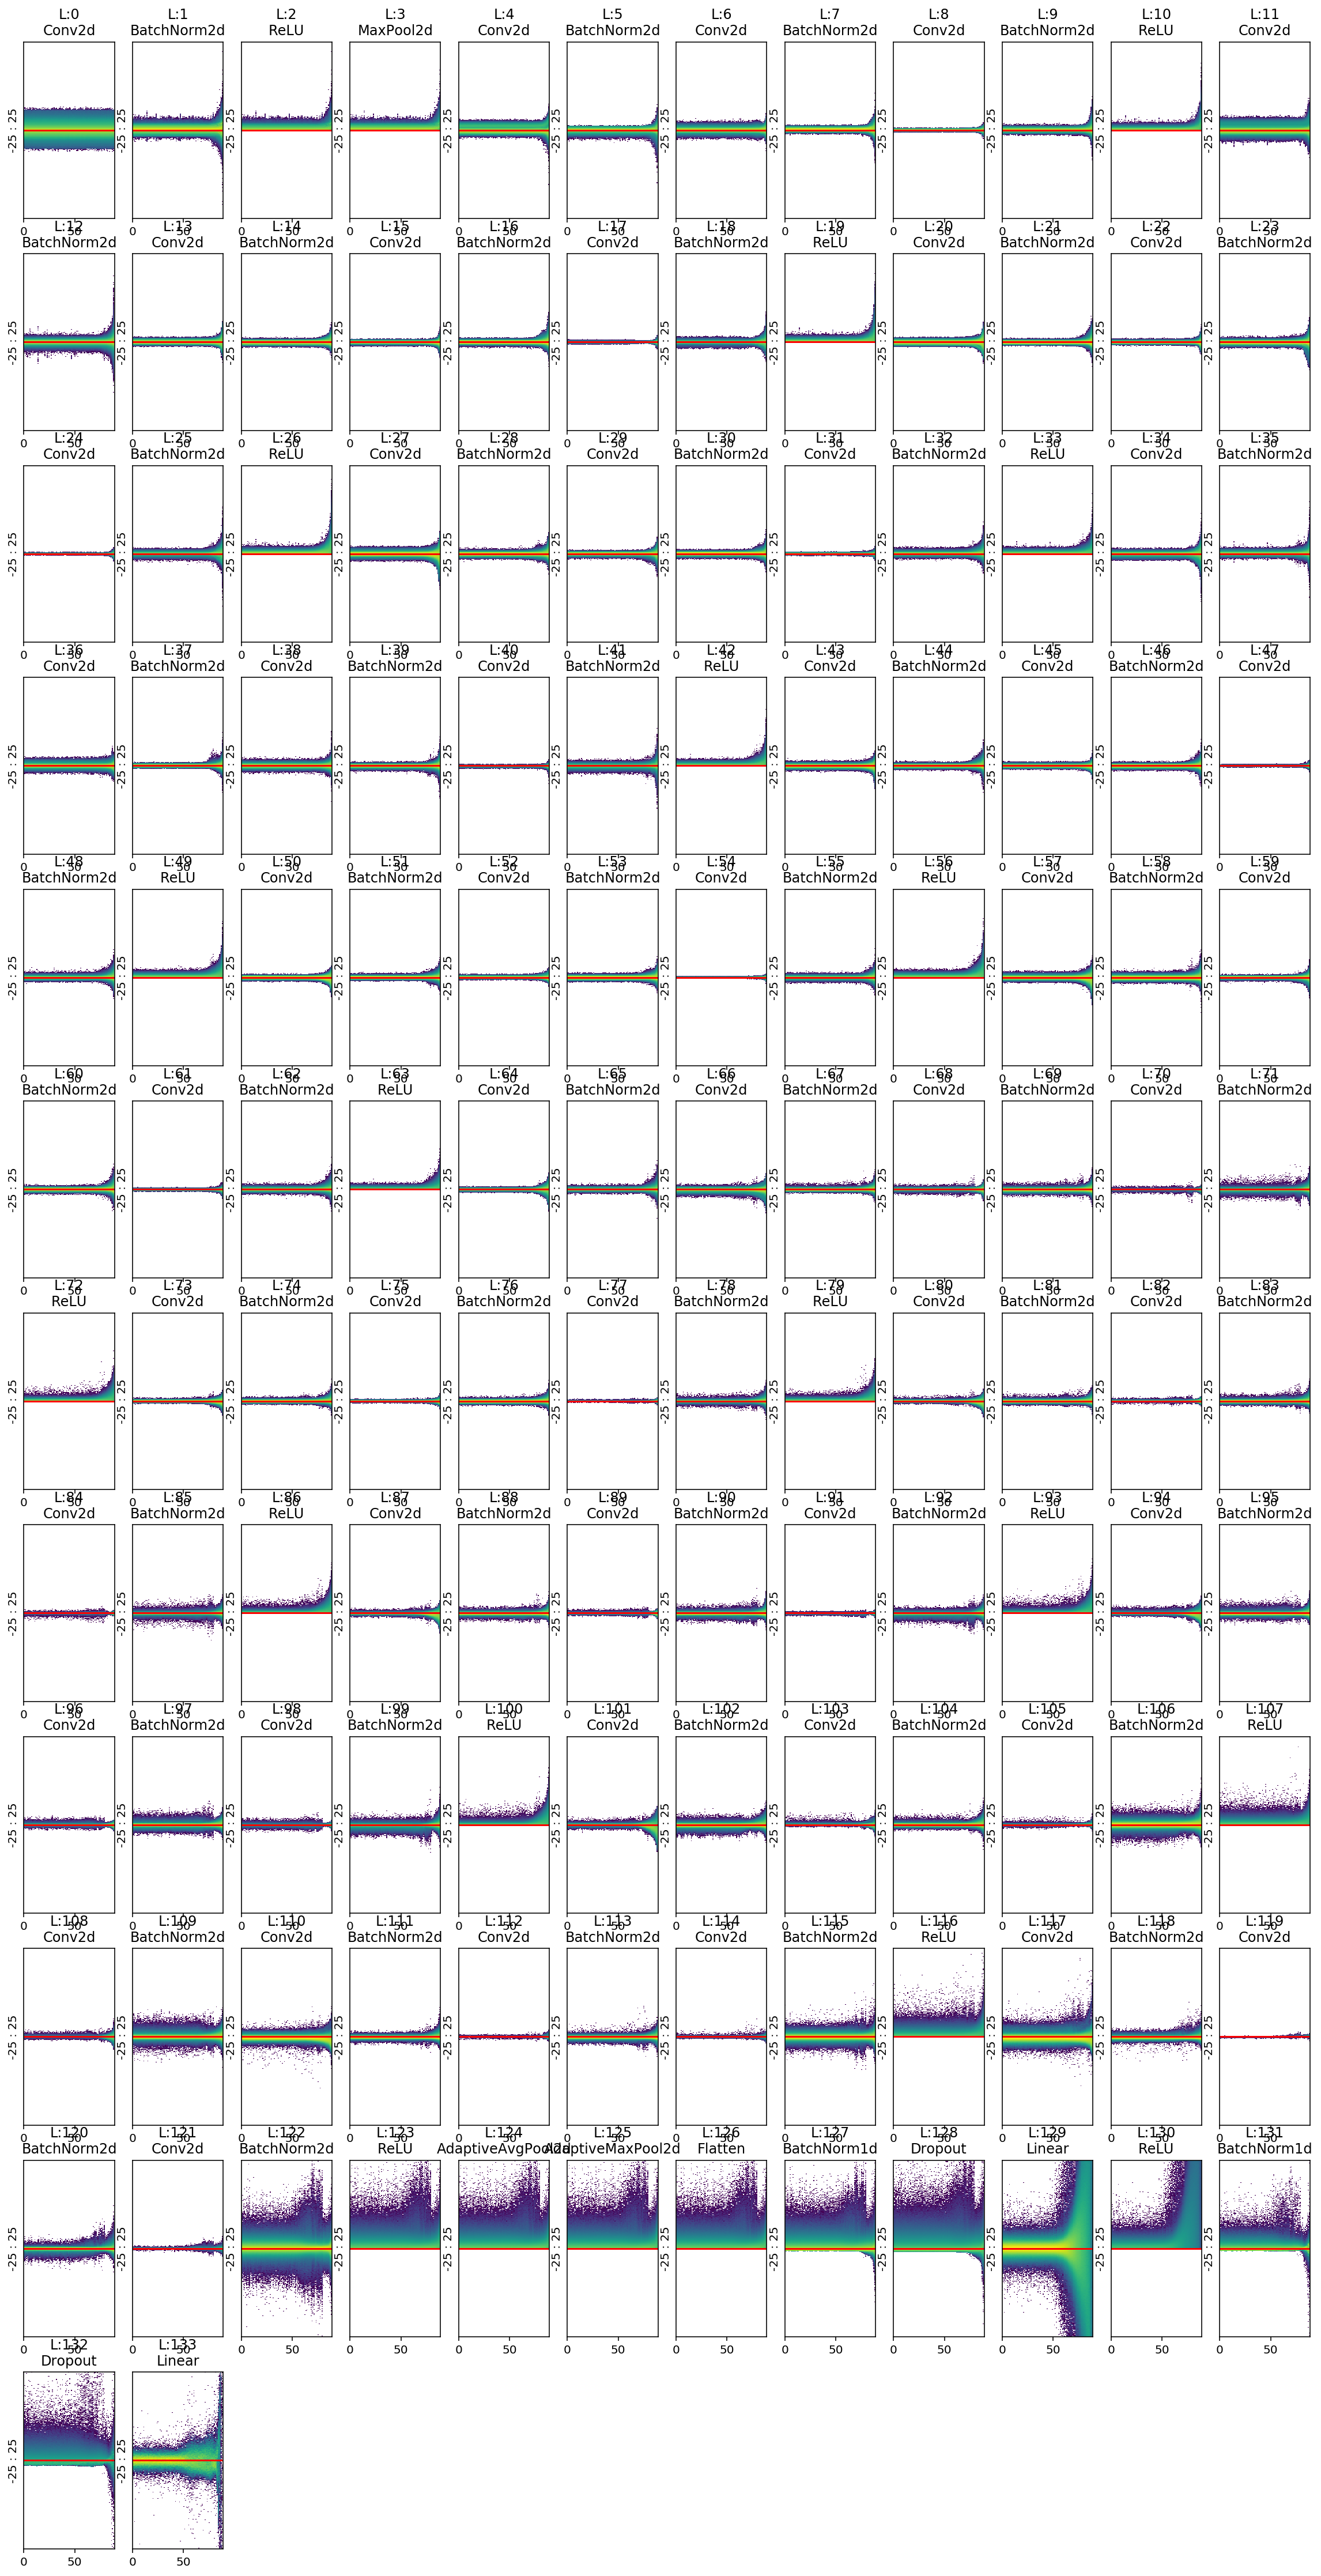

In [5]:
learn.activations_histogram.plotActsHist(cols=12, figsize=(20,40), showEpochs=False)

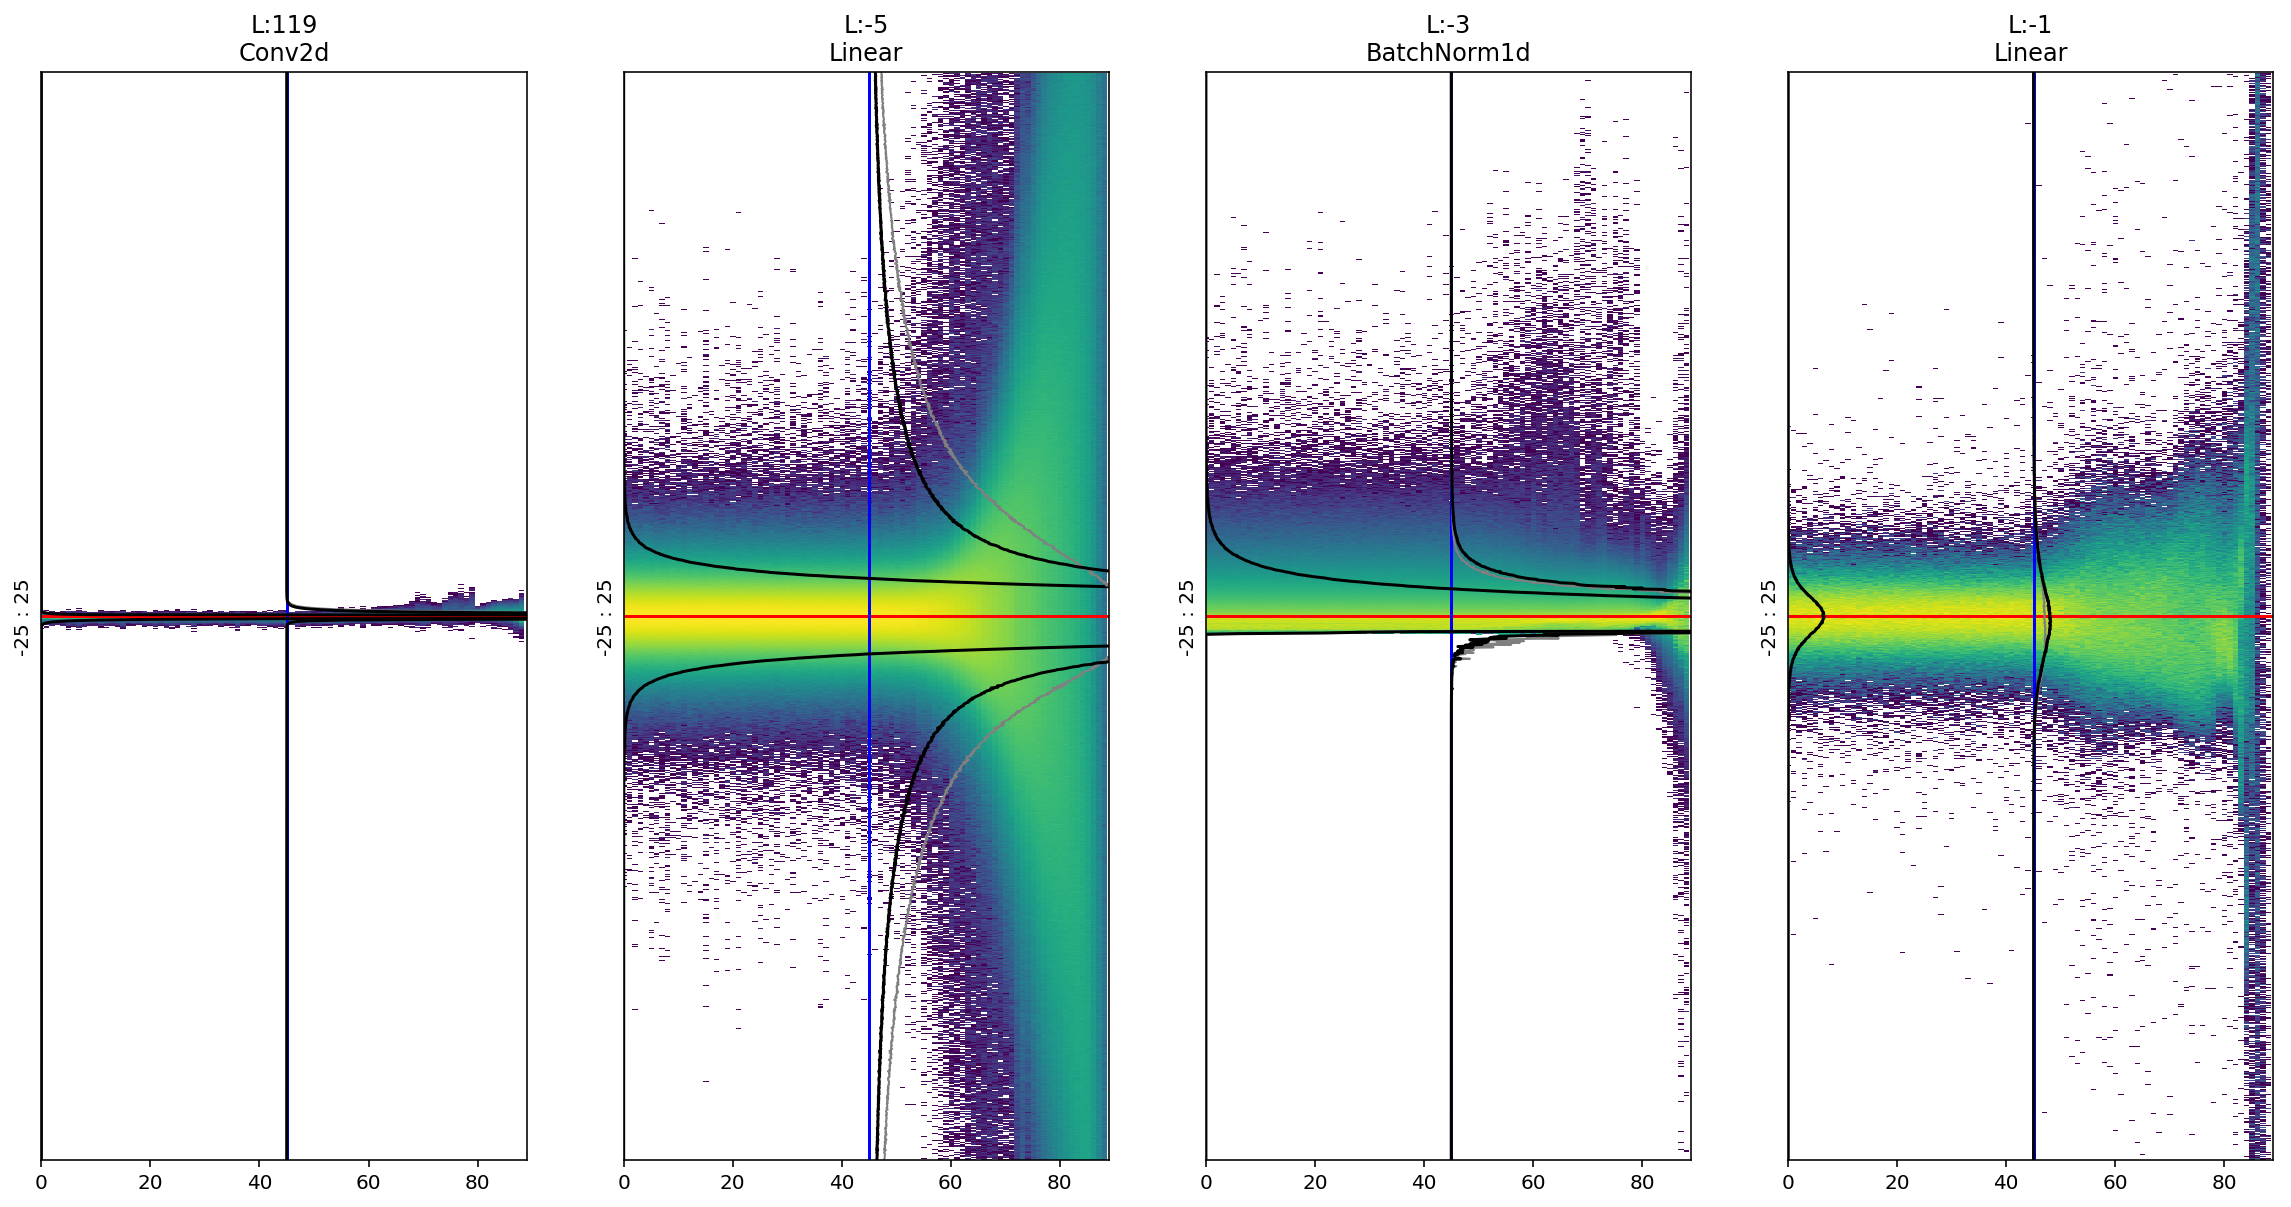

In [6]:
learn.activations_histogram.plotActsHist(toDisplay=[119,-5,-3,-1], figsize=(20,10), showEpochs=True, cols=4)

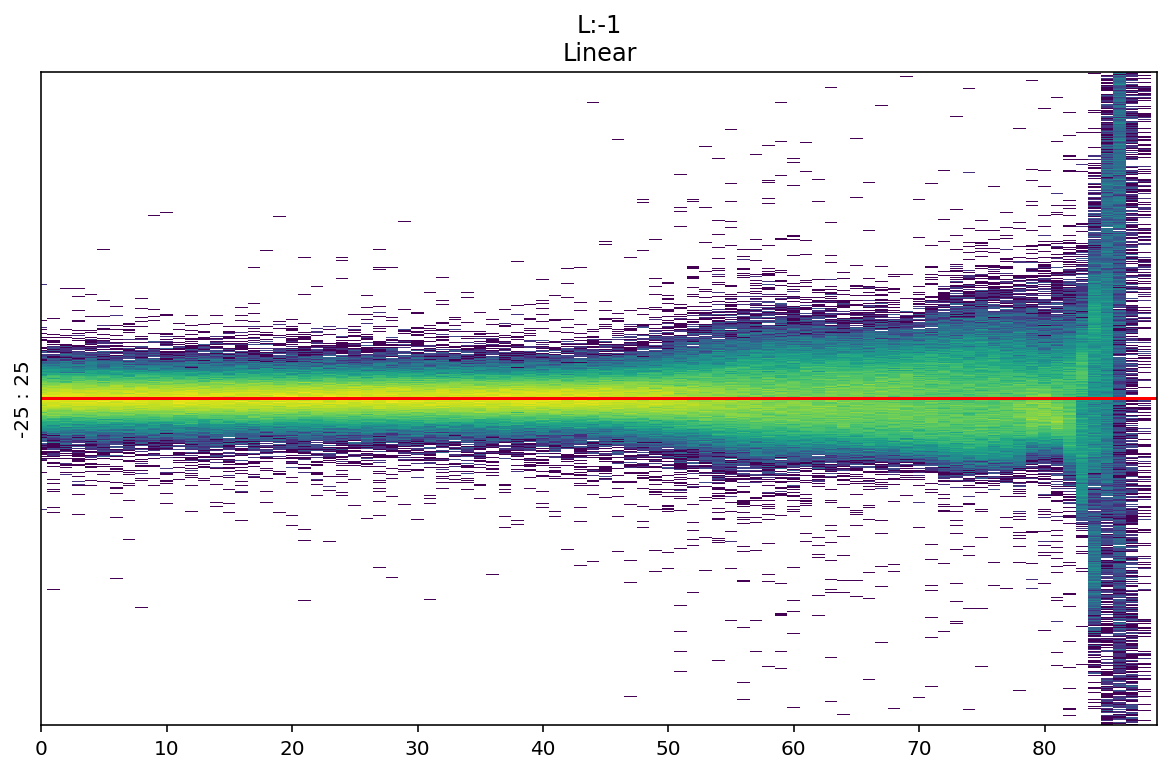

In [7]:
learn.activations_histogram.plotActsHist(toDisplay=-1, figsize=(10,6), showEpochs=False)

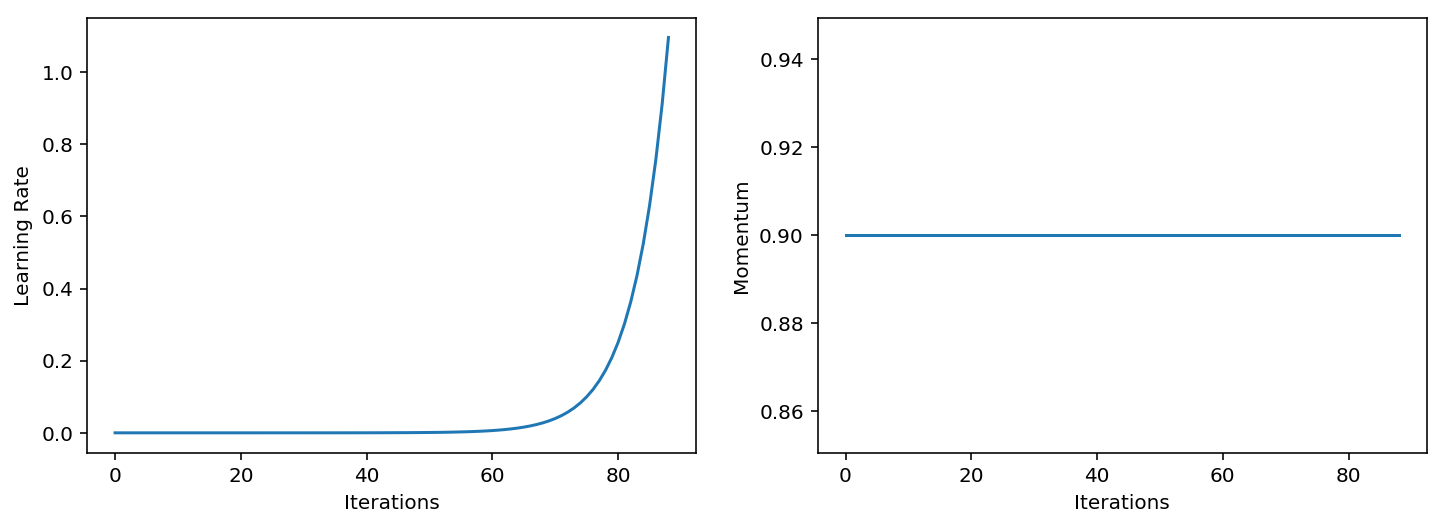

In [8]:
learn.recorder.plot_lr(show_moms=True)

As we can see the behaviour in last layer follow the learning rate trend.

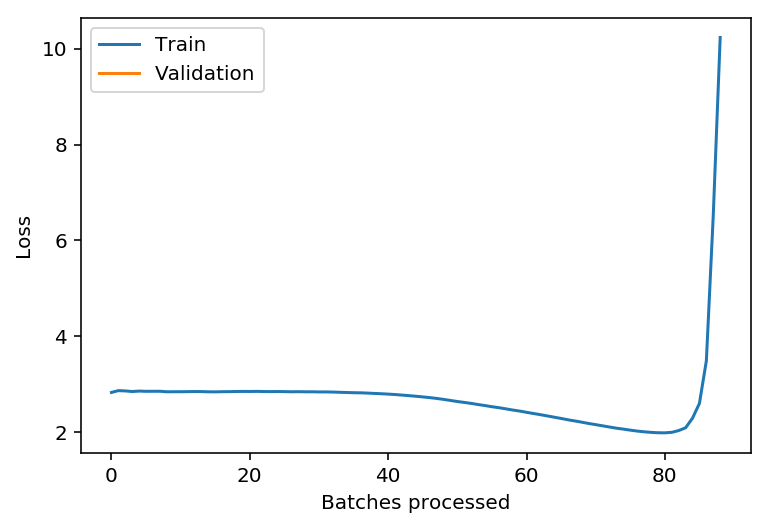

In [9]:
learn.recorder.plot_losses()

Comparing the colorful picture in the last layer with the plot of the loss we can see a similar behaviour: according to the the lr_finder the best LR is about 2e-2 that means about batch 80, where in the chart there is a kind of bottlenec.

## Train the model

Len befor: 60000
Classes: 10 => ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


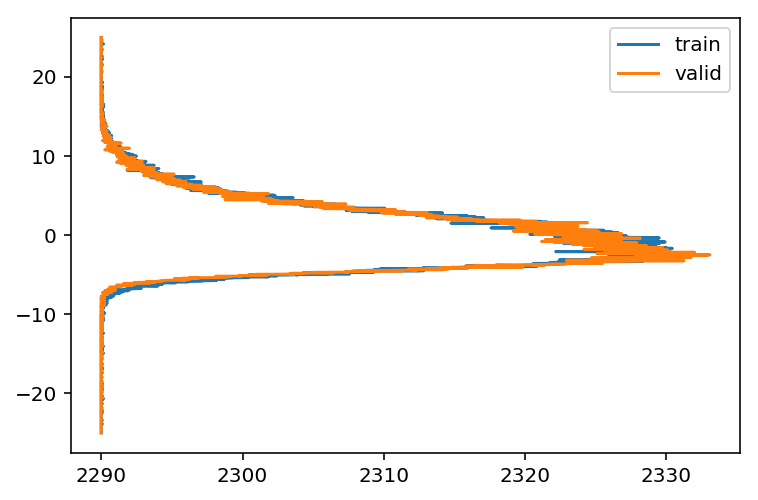

In [10]:
actsh = partial(ActivationsHistogram,hMin=-25,hMax=25,nBins=1600,modulesId=-1,useClasses=True)

bs = 1024
path = untar_data(URLs.CIFAR)
items = ImageList.from_folder(path)
print(f'Len befor: {len(items)}')
data = (items.split_by_rand_pct(.2,seed=123)
        .label_from_folder()
        .databunch(bs=bs)
       )
print(f'Classes: {data.c} => {data.classes}')

learn = cnn_learner(data, models.resnet50, 
                    callback_fns=actsh,
                    metrics=accuracy)
learn.fit_one_cycle(6,max_lr=slice(1e-3,1e-2))

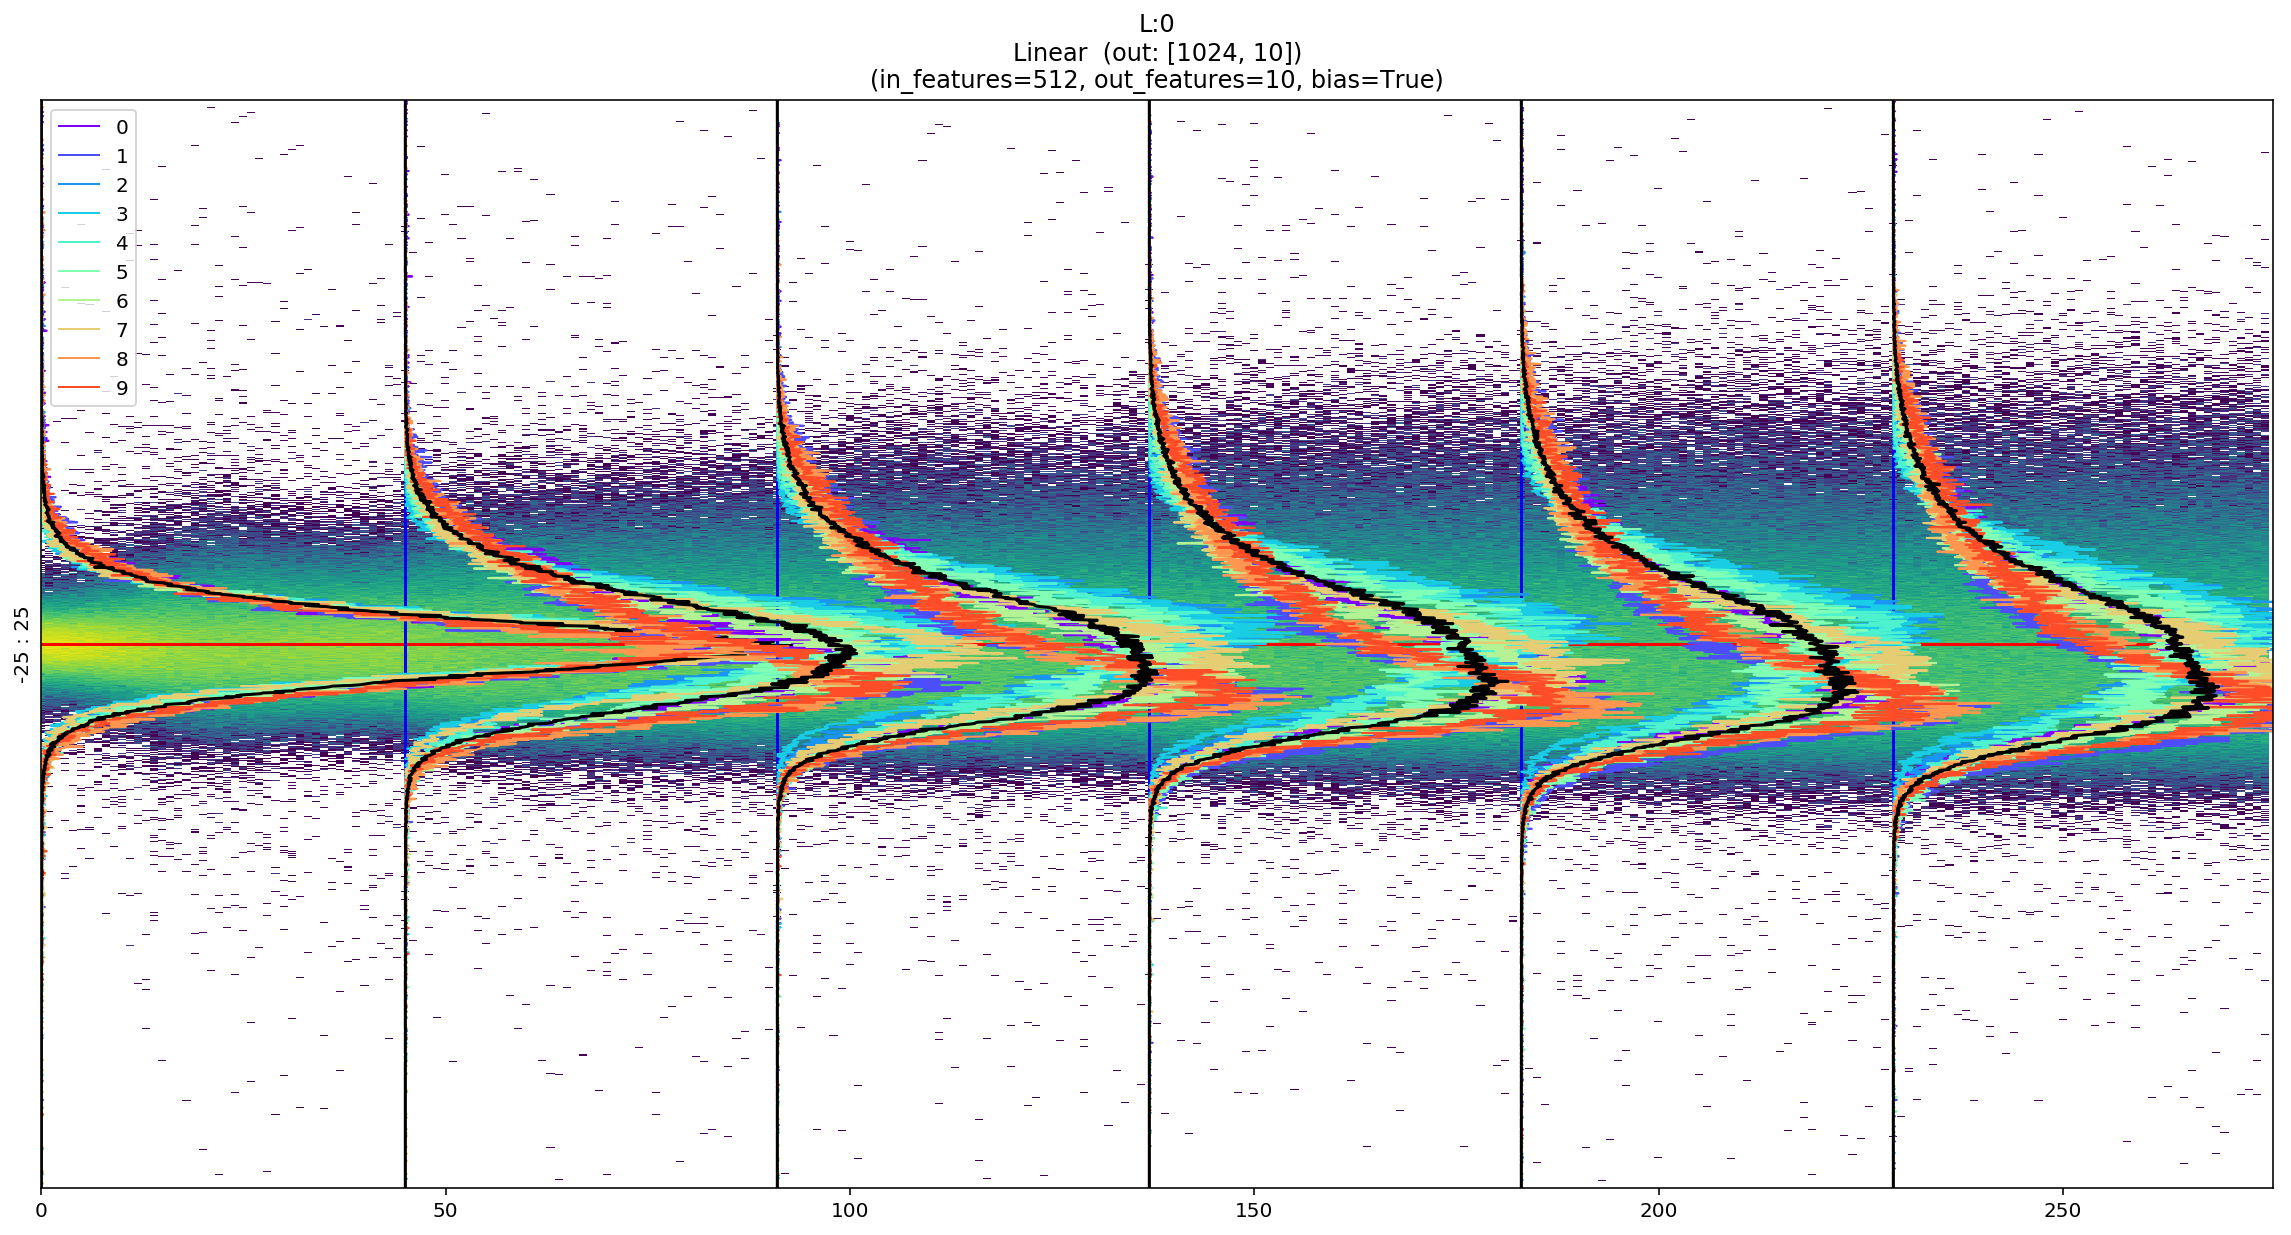

In [11]:
learn.activations_histogram.plotActsHist(cols=1, figsize=(20,10), showEpochs=True, hScale=10, showLayerInfo=True)

In [12]:
learn.unfreeze()

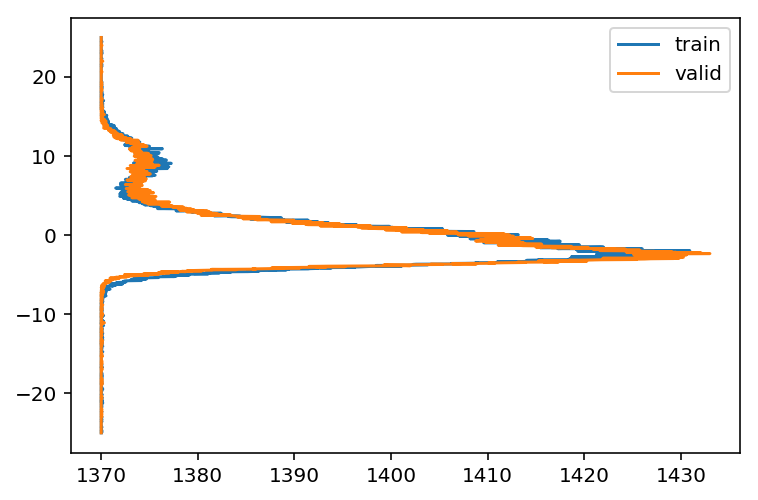

In [13]:
learn.fit_one_cycle(4,max_lr=slice(1e-3,1e-2))

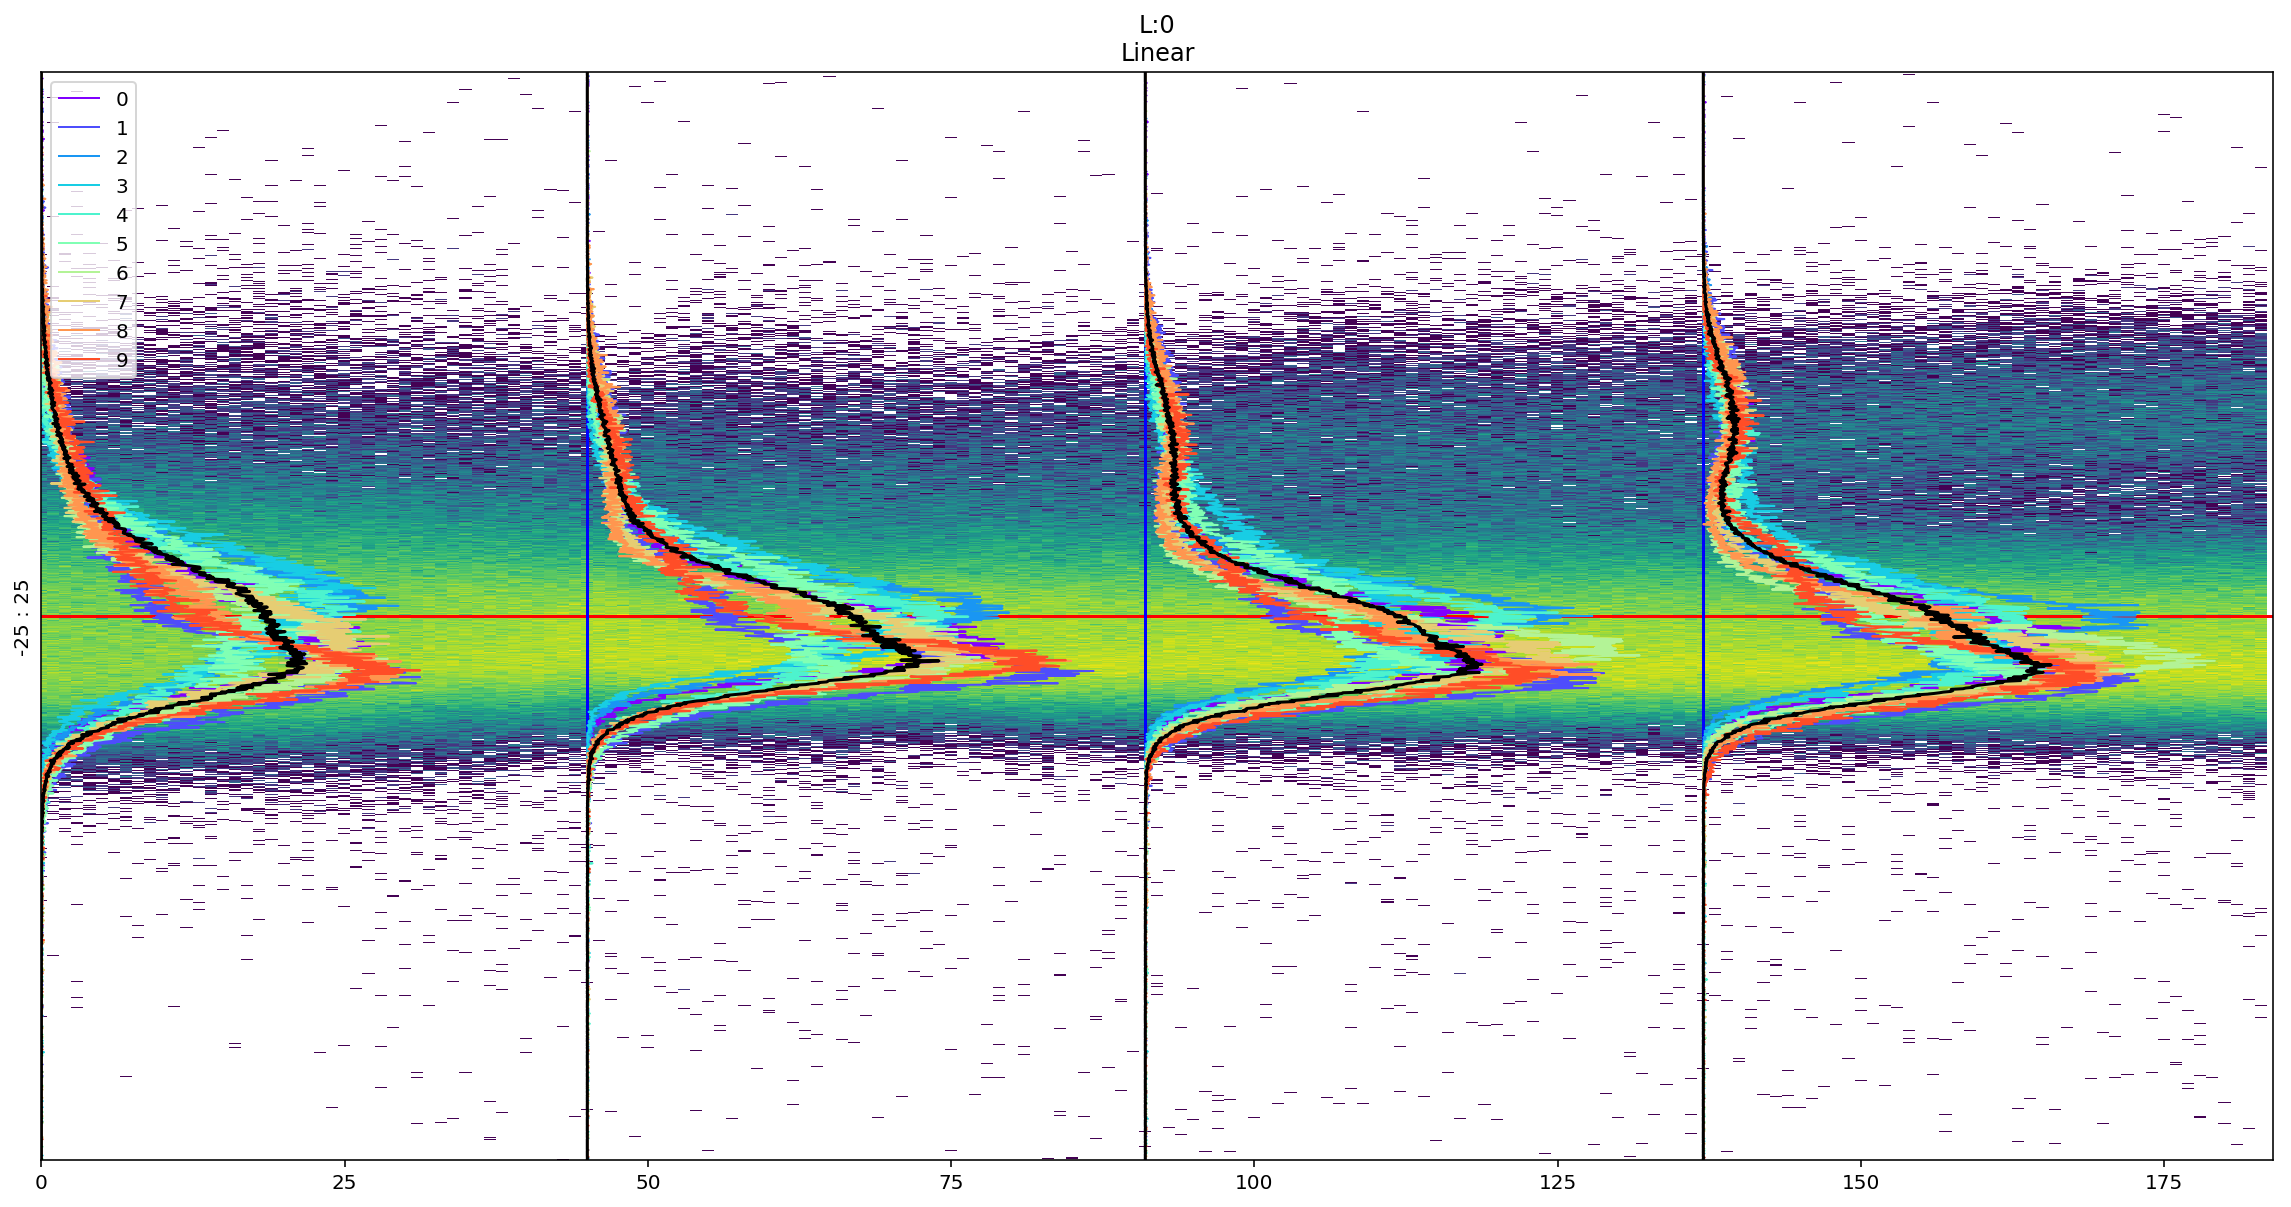

In [14]:
learn.activations_histogram.plotActsHist(cols=1, figsize=(20,10), showEpochs=True, hScale=5)

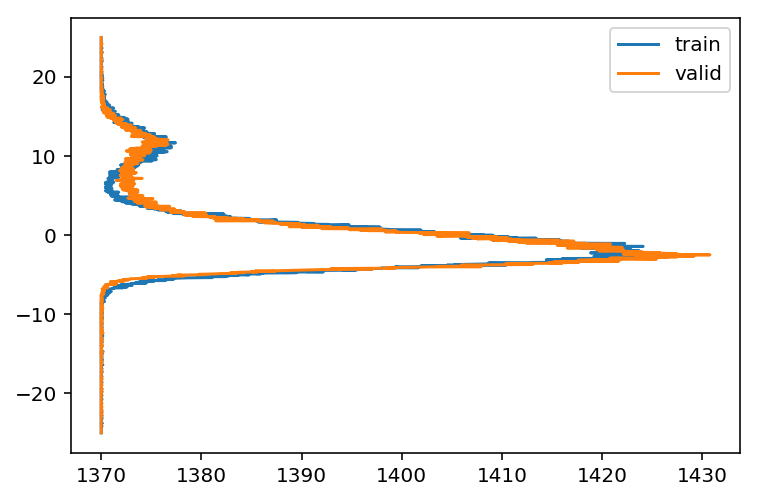

In [15]:
learn.fit_one_cycle(4,max_lr=slice(1e-3))

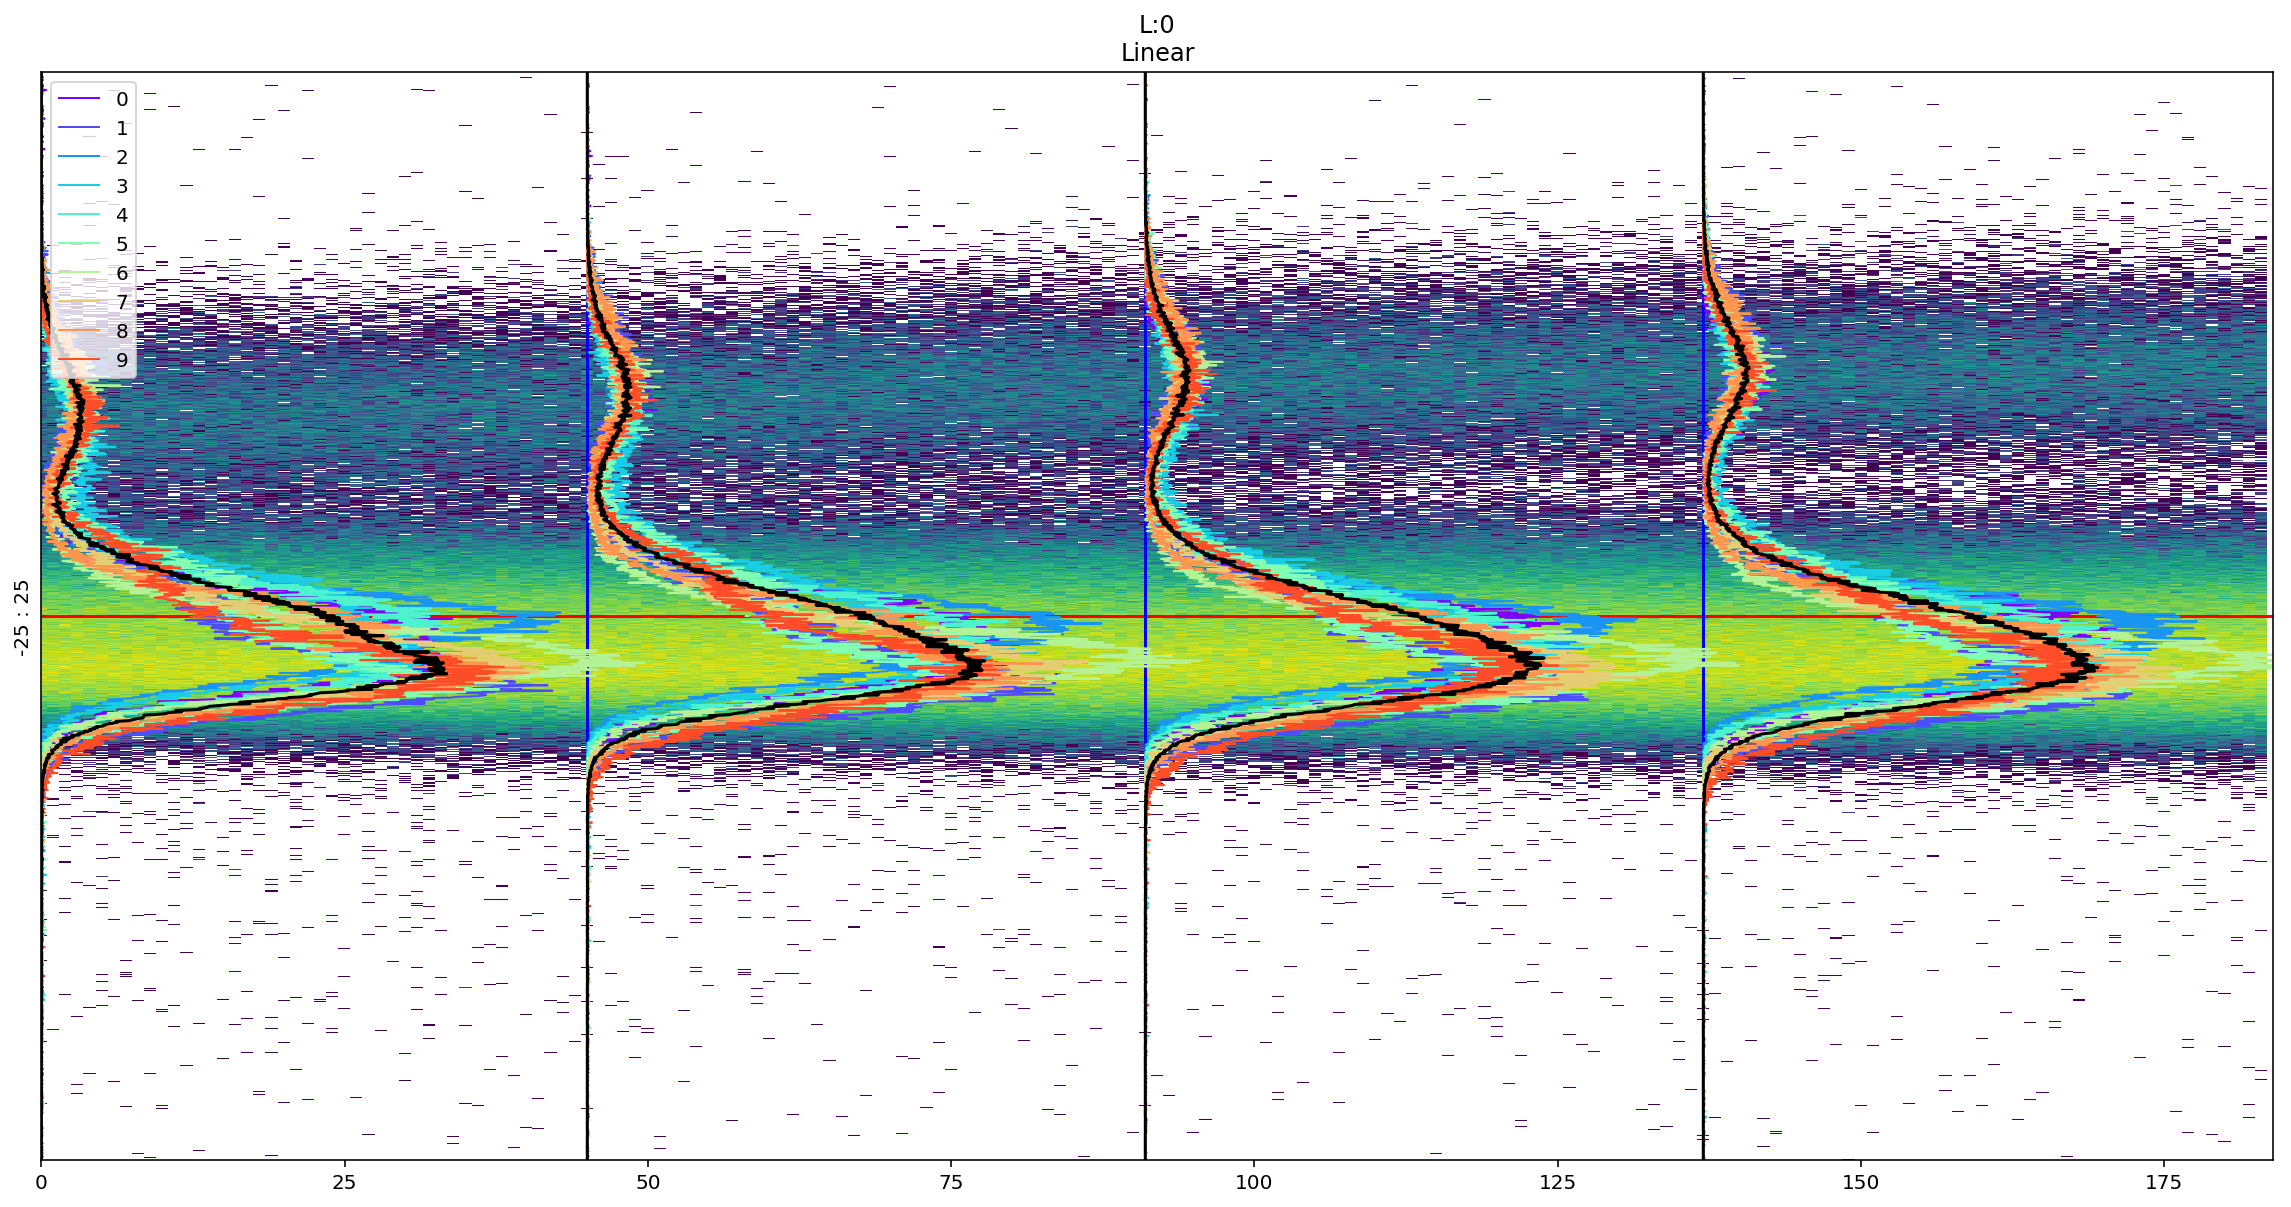

In [16]:
learn.activations_histogram.plotActsHist(cols=1, figsize=(20,10), showEpochs=True, hScale=6)

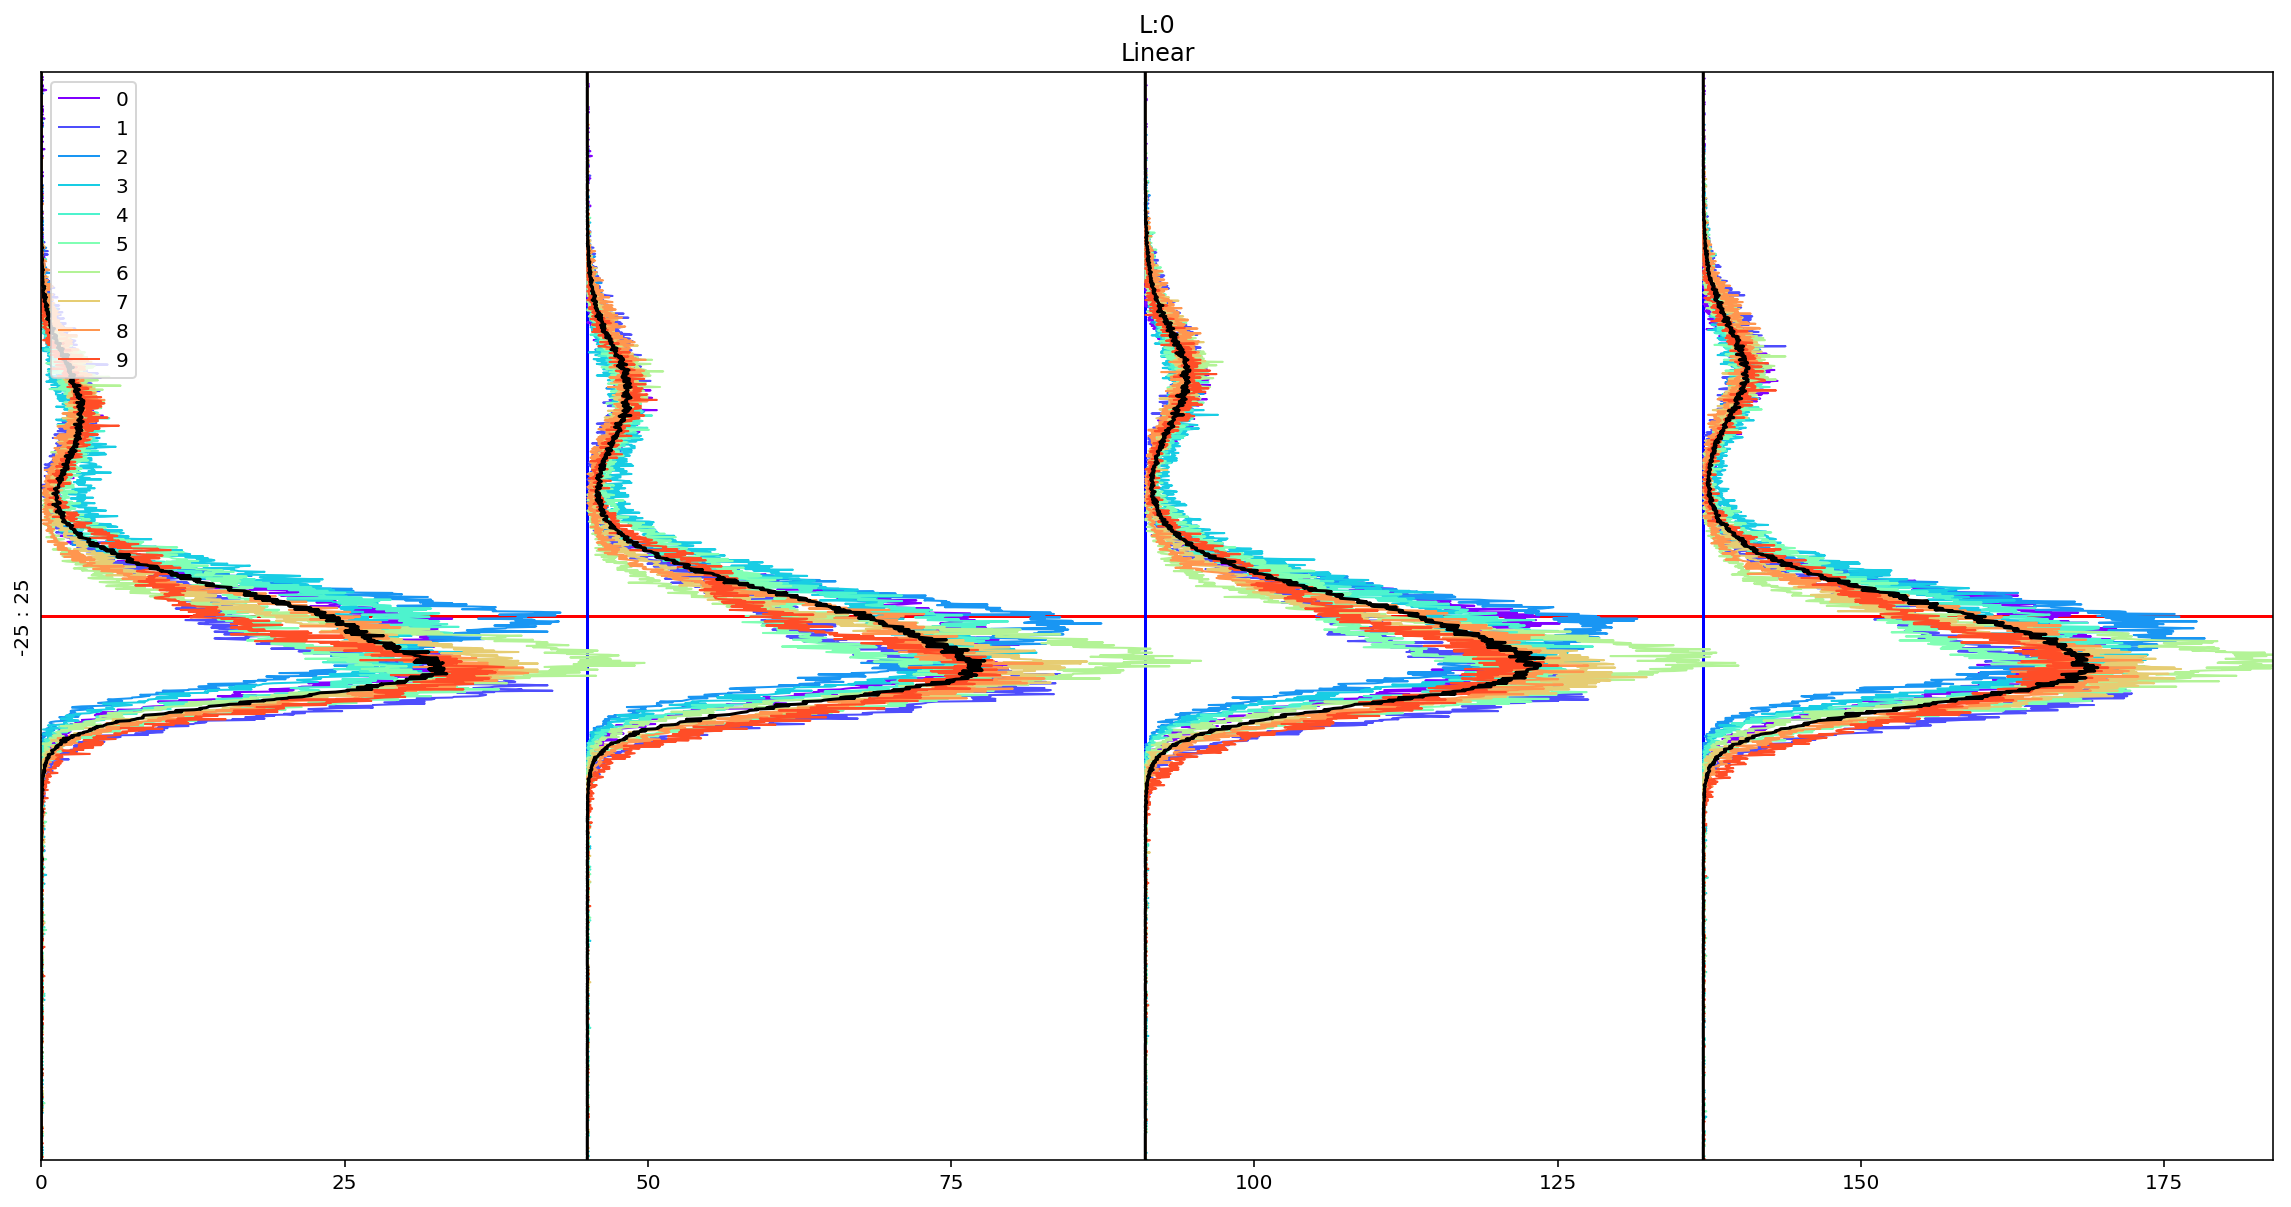

In [17]:
learn.activations_histogram.plotActsHist(cols=1, figsize=(20,10), showEpochs=True, hScale=6, showImage=False)

The way to say YES and NO is different fo the different classes

In [19]:
for i,c in enumerate(data.classes): print(i,c)

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck
